In [ ]:
# pip install tensorflow

     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.5 kB 1.3 MB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.5 kB 388.9 kB/s eta 0:00:01
     -------------------------------------- 57.5/57.5 kB 502.5 kB/s eta 0:00:00
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ------------------------- -------------- 41.0/65.5 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 65.5/65.5 kB 699.3 kB/s eta 0:00:00
     ---------------------------------------- 0.0/151.7 kB ? eta -:--:--
     --------------- ----------------------- 61.4/151.7 kB 1.1 MB/s eta 0:00:01
     ----------------------------------- -- 143.4/151.7 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 151.7/151.7 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/300.9 MB 2.0 MB/s eta 0:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('./datasets/Rice_Cammeo_Osmancik.csv')

In [ ]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [ ]:
df = df.replace(['Cammeo','Osmancik'] ,[0,1])

In [ ]:
from sklearn.model_selection import train_test_split
x  = df.drop(df.columns[7], axis=1)
y = df.iloc[:,7]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state=45)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score , confusion_matrix

In [ ]:
model =Sequential()
model.add(Dense(7,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50


96/96 [==============================] - 2s 8ms/step - loss: 0.7140 - accuracy: 0.5459 - val_loss: 0.6844 - val_accuracy: 0.6575
Epoch 2/50
96/96 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.7979 - val_loss: 0.6035 - val_accuracy: 0.8438
Epoch 3/50
96/96 [==============================] - 0s 3ms/step - loss: 0.5625 - accuracy: 0.8789 - val_loss: 0.5195 - val_accuracy: 0.8766
Epoch 4/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.8973 - val_loss: 0.4555 - val_accuracy: 0.8963
Epoch 5/50
96/96 [==============================] - 0s 4ms/step - loss: 0.4418 - accuracy: 0.9052 - val_loss: 0.4115 - val_accuracy: 0.9003
Epoch 6/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4058 - accuracy: 0.9078 - val_loss: 0.3793 - val_accuracy: 0.9042
Epoch 7/50
96/96 [==============================] - 0s 3ms/step - loss: 0.3780 - accuracy: 0.9098 - val_loss: 0.3547 - val_accuracy: 0.9068
Epoch 8/50
96/96 [

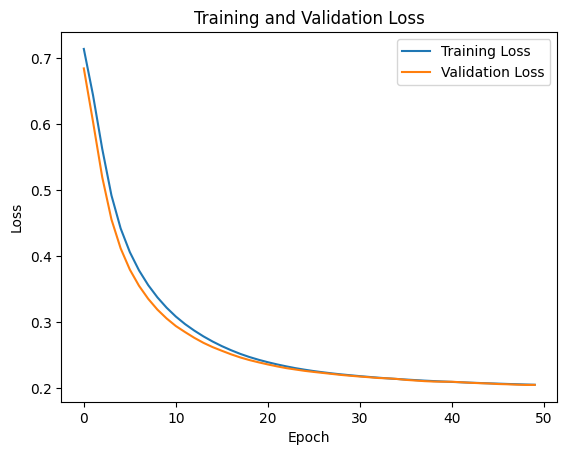

In [ ]:
import matplotlib.pyplot  as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions
y_pred = model.predict(x_test)
y_pred = [0 if val <0.5 else 1 for val in y_pred]
accuracy_score(y_test,y_pred)

24/24 [==============================] - 0s 2ms/step


0.9225721784776902

In [ ]:
model.save('rice')

INFO:tensorflow:Assets written to: tumer\assets


INFO:tensorflow:Assets written to: tumer\assets


In [ ]:
# model = load_model('rice')

In [ ]:
cm =confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[305,  38],
       [ 21, 398]], dtype=int64)